<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([2.886748  , 6.90858556, 6.01829704, 5.68192727, 6.27542027,
       3.86517937, 4.5373216 , 4.87619062, 6.7053292 , 4.14676091])

### 1.2 Visualising the random numbers

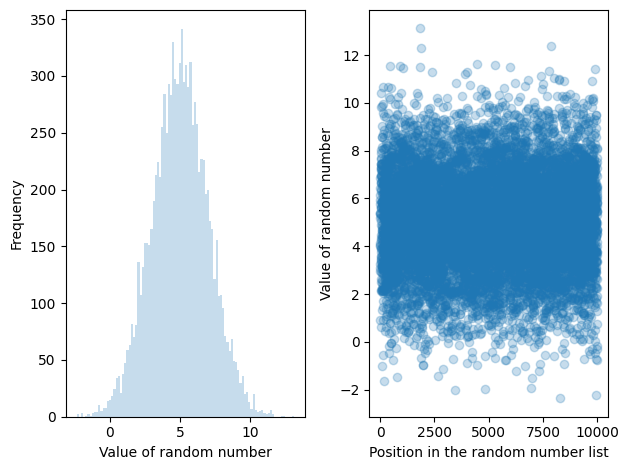

In [29]:
from matplotlib import pyplot as plt
n=1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis=ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel('Value of random number')
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()
plt.show()

### 1.3 68%?

In [7]:
n = 10_000
mean, sd= 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean-sd) & (random_numbers <= mean+sd)

print(f'% of points between 1 std.dev. from the mean): {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean): 68.07%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [2]:
import numpy.random as rnd

def brown_1d(prob_right=.5, no_of_steps=10000):
    
    step_size=1
    x=0
    
    for _ in range(no_of_steps):
        if rnd.random() < prob_right:
            x+= step_size
        else:
            x-= step_size
    return x

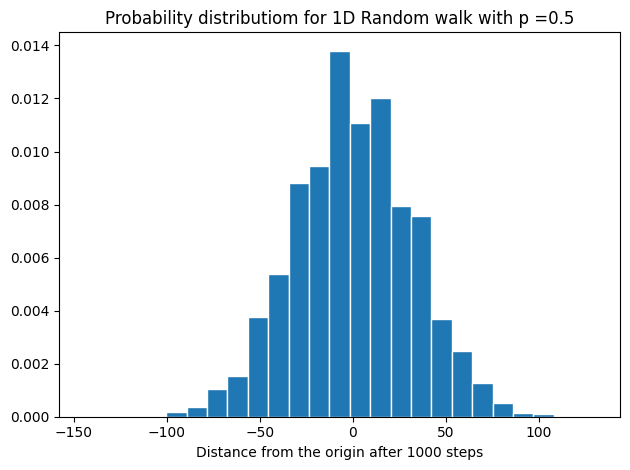

In [4]:
no_of_steps, p = 1_000,.5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
          for _ in range(repeats)]

plt.hist(results, bins=25, density=True, edgecolor ="white")
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distributiom for 1D Random walk with p ={p}')

plt.tight_layout()
plt.show()

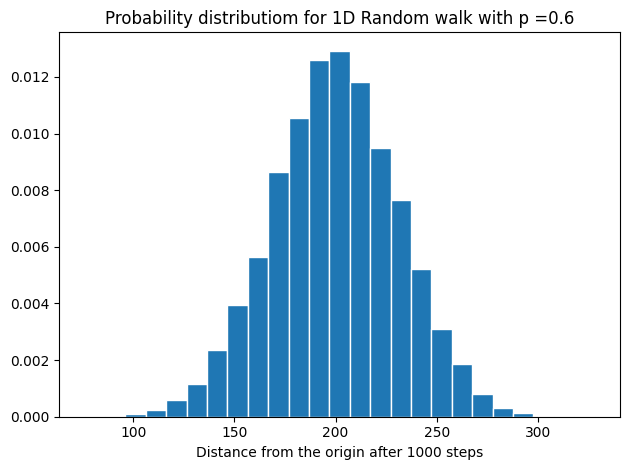

In [5]:
no_of_steps, p = 1_000,.6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
          for _ in range(repeats)]

plt.hist(results, bins=25, density=True, edgecolor="white")
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distributiom for 1D Random walk with p ={p}')

plt.tight_layout()
plt.show()

### 1.3 What does theory say?

In [6]:
def normal(x, m=0,s=1):
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output/= np.sqrt(2*np.pi*s2)
    return output

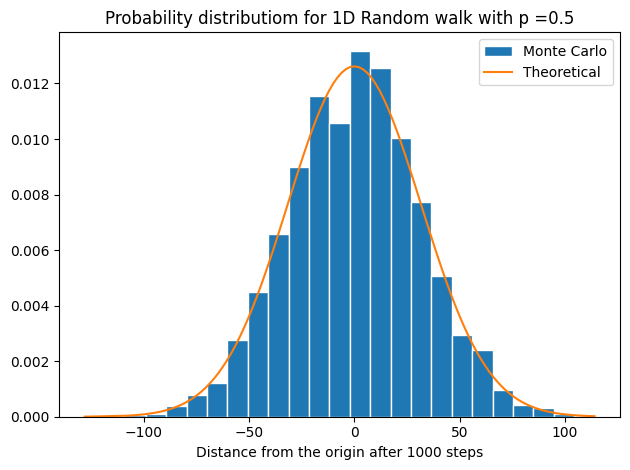

In [15]:
no_of_steps, p = 1_000,.5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
          for _ in range(repeats)]

prob_left = 1 - p
mean = no_of_steps * (p - prob_left)
sd = np.sqrt(4*no_of_steps*p*prob_left)
x = np.unique(results)

plt.hist(results, bins=25, density=True, edgecolor ="white", label='Monte Carlo')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distributiom for 1D Random walk with p ={p}')
plt.plot(x, normal(x, mean, sd), label='Theoretical')

plt.legend()
plt.tight_layout()
plt.show()

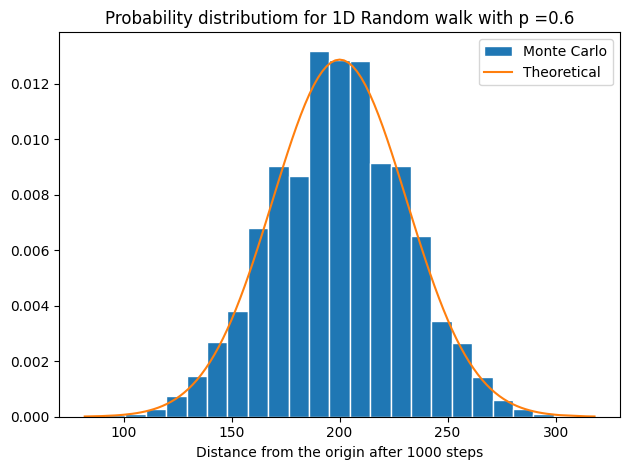

In [14]:
no_of_steps, p = 1_000,.6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
          for _ in range(repeats)]

prob_left = 1 - p
mean = no_of_steps * (p - prob_left)
sd = np.sqrt(4*no_of_steps*p*prob_left)
x = np.unique(results)

plt.hist(results, bins=25, density=True, edgecolor ="white", label='Monte Carlo')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distributiom for 1D Random walk with p ={p}')
plt.plot(x, normal(x, mean, sd), label='Theoretical')

plt.legend()
plt.tight_layout()
plt.show()

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:
# Numpy's PRNG to estimate pi


### 2.2 A poor but intuitive solution

In [17]:
N_total = 100_000
N_green=0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)
    
    if r <=1:
        N_green +=1
        
4*N_green / N_total   

3.1362

### 2.3 A better solution

In [4]:
import numpy as np
import numpy.random as rnd
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green = np.sum((x**2 + y**2) <=1)

4* (N_green/N_total)

3.141268

### 2.4 A smarter solution

In [5]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green = np.sum((x**2+y**2)<=1)

4*(N_green/N_total)

3.141528

## Exercise 1 :  Vital Stats of Random π

In [20]:
#1
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green = np.sum((x**2+y**2)<=1)
    return 4*(N_green/n)

In [21]:
#2
estimate_pi(n=10000)
no_of_repeats = 100
result = [estimate_pi(n=10000) for _ in range (no_of_repeats)]
np.mean(result)

3.141148

In [22]:
np.std(result)

0.016335644952067234

In [26]:
n_repeats = []
mean_n =[]
std_n=[]

for a in range (1,7):
    n_repeats.append(10**a)
    mean=np.mean([estimate_pi(10**a)for _ in range(100)])
    mean_n.append(mean)
    std=np.std([estimate_pi(10**a)for _ in range(100)])
    std_n.append(std)
    
print(mean_n,std_n)

[3.144, 3.1228000000000002, 3.1352800000000007, 3.1432640000000003, 3.1425544000000003, 3.14162432] [0.4729312846492607, 0.17619807036400822, 0.053733252274546, 0.018088785033826882, 0.005191625548900827, 0.0017001352021530707]


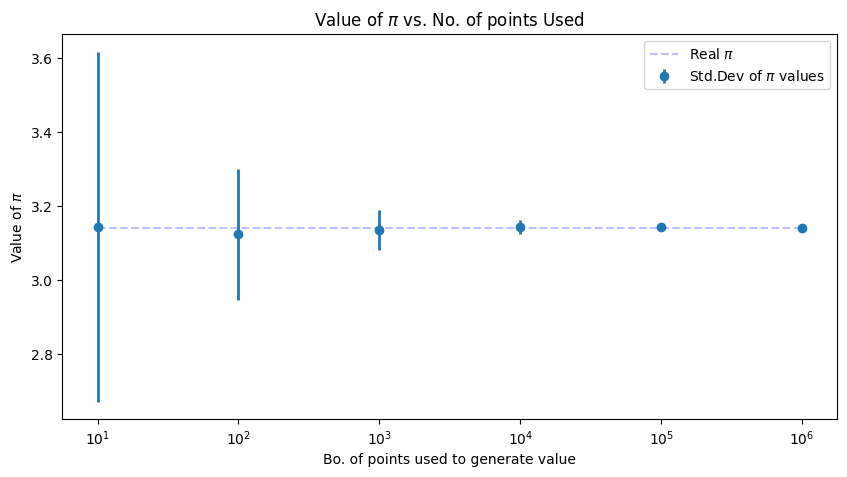

In [36]:
y = mean_n
x = n_repeats
yerr = std_n
y1=np.pi

fig, ax = plt.subplots(figsize=(10,5))
plt.hlines(y1, x[0], x[-1],color='blue', linestyle='dashed', label="Real $\pi$", alpha=.25)
ax.errorbar(x, y, yerr,fmt='o', linewidth=2, capsize=0, label='Std.Dev of $\pi$ values')

plt.title('Value of $\pi$ vs. No. of points Used')
plt.ylabel('Value of $\pi$')
plt.xlabel('Bo. of points used to generate value')

plt.legend(loc='upper right')

ax.set_xscale('log')
plt.minorticks_off()
plt.show()
